# Inputs

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, accuracy_score

# Datasets

In [38]:
frac_df =  pd.read_csv(
    './Data_lab_1/frac.csv', 
    sep=";"
)
result_slice_df = pd.read_csv(
    './Data_lab_1/result_slice.csv',
    encoding = "windows-1251", 
    sep=","
)

## Frac инфо

In [39]:
display(frac_df)
display(frac_df.shape)
display(frac_df.info())
display(frac_df.describe())

,well_index,well_cluster_index,date_fracturing,date_begin,year,wellbore_type,well_type,well_character,uchastok_gpa,uchastok_monit,...,stratum_list_perf_nagn1,receptivity_avg_nagn1,receptivity_sum_nagn1,azimuth_stress_nagn1,bottomhole_pressure_nagn1,h_nagn1,h_perf_nagn1,porosity_perf_nagn1,dist_flood_nagn1,result_qoil3
0,1052F,0,09.11.21,24.11.21,2021,NNS,deyst,Neftyanaya,A,A-2,...,NaN,"0,0589331004822001","0,100836187783021","0,0271321810615717","0,890154454972665","0,0691471436238595","0,101043262566572","0,815130970724192","0,637183827209803","0,02"
1,449,99,16.11.12,28.11.12,2012,NNS,deyst,Neftyanaya,B,B-7,...,"plX-1,plX-2","0,343658047751155","0,513470636142953","0,527776838191663",NaN,"0,476516182179009","0,420642737287517","0,834360554699539","0,679070424683053","0,14"
2,449,99,23.05.16,28.05.16,2016,NNS,deyst,Neftyanaya,B,B-7,...,"plX-1,plX-2","0,327586534939656","0,58892079123965","0,527258421662559",NaN,"0,476516182179009","0,420642737287517","0,834360554699539","0,665567047687821","0,01"
3,449,99,08.10.94,06.10.94,1994,NNS,deyst,Neftyanaya,B,B-7,...,"plX-1,plX-2","0,234812128491888","0,212313869174507","0,527776838191663",NaN,"0,476516182179009","0,420642737287517","0,834360554699539","0,74700638094068","0,05"
4,453,99,02.07.10,11.07.10,2010,NNS,bd,Neftyanaya,B,B-7,...,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,"0,11"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,1067C,42B,05.11.13,11.11.13,2013,NNS,bd,Neftyanaya,D,D-10,...,"plX-1,plX-6","0,0584346617927321","0,0159254300079734","0,0127843557084446","0,414751260117184","0,199603090403026","0,291675786094696","0,80431432973806","0,754131820936258","0,13"
1470,308,42B,27.08.12,11.09.12,2012,NNS,bd,Neftyanaya,D,D-10,...,plX-1,"0,125978669414552","0,152512737386027","0,751492126241489",NaN,"0,1897802019496","0,163383672576056","0,769645608628661","0,558010346254466","0,10"
1471,312,42B,17.12.12,29.12.12,2012,NNS,bd,Neftyanaya,D,D-10,...,"plX-1,plX-2,plX-6","0,0773222819826392","0,00200912503639957","0,722407295091014","0,369719661239563","0,303985321833772","0,2999379878894","0,774268104776581",1,"0,02"
1472,313,42B,11.09.14,22.09.14,2014,NNS,deyst,Neftyanaya,D,D-11,...,"plX-1,plX-2,plX-6","0,17556396340943","0,019848696090012","0,789390038390082","0,369719661239563","0,303985321833772","0,2999379878894","0,774268104776581","0,66664700403549","0,05"


(1474, 103)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Columns: 103 entries, well_index to result_qoil3
dtypes: float64(1), int64(6), object(96)
memory usage: 1.2+ MB


None

,year,kratnost,number_of_permeable_intervals,cnt_1000,cnt_nagn_1000,nagn_all_1000,oil_all_1000
count,1474.000000,1472.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,2006.527815,1.559103,6.812076,6.989824,2.807327,2.807327,6.989824
std,8.129358,0.697114,4.356869,4.647730,1.878756,1.878756,4.647730
min,1990.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000
50%,2006.000000,1.000000,6.000000,6.000000,3.000000,3.000000,6.000000
75%,2013.000000,2.000000,9.000000,10.000000,4.000000,4.000000,10.000000
max,2021.000000,5.000000,38.000000,26.000000,10.000000,10.000000,26.000000


## Result slice инфо

In [40]:
display(result_slice_df)
display(result_slice_df.shape)
display(result_slice_df.info())
display(result_slice_df.describe())

,Unnamed: 0,DEPT,AGK,BK,DS,DT,GGKP,GK,GZ1,GZ2,...,NGK,NKT,PS,PZ,SATURAT_new,Soil_new,kp_new,well,FZ,EF_b
0,0,3732.4,0.199,9.570,NaN,257.953003,2.570,4.806,NaN,NaN,...,NaN,3.667,399.864990,13.26,NaN,NaN,NaN,192,NaN,4.0
1,1,3732.5,0.268,9.520,NaN,258.623993,2.549,4.608,NaN,NaN,...,NaN,3.581,399.803009,13.32,NaN,NaN,NaN,192,1.0,4.0
2,2,3732.6,0.297,8.530,NaN,260.045990,2.508,4.523,NaN,NaN,...,NaN,3.475,399.740997,13.29,NaN,NaN,NaN,192,1.0,4.0
3,3,3732.7,0.278,8.120,NaN,261.467987,2.467,4.578,NaN,NaN,...,NaN,3.382,399.618011,13.32,NaN,NaN,NaN,192,1.0,4.0
4,4,3732.8,0.243,8.480,NaN,263.162994,2.448,4.680,NaN,NaN,...,NaN,3.305,399.493988,13.20,NaN,NaN,NaN,192,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,18293,3710.6,0.341,12.230,NaN,243.220001,NaN,10.770,10.990,22.350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0
18294,18294,3710.7,0.295,10.715,NaN,244.119995,NaN,11.010,10.485,21.565001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0
18295,18295,3710.8,0.249,9.200,NaN,245.020004,NaN,11.250,9.980,20.780001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0
18296,18296,3710.9,0.326,9.650,NaN,245.679993,NaN,10.850,9.830,20.585001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0


(18298, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298 entries, 0 to 18297
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   18298 non-null  int64  
 1   DEPT         18298 non-null  float64
 2   AGK          17837 non-null  float64
 3   BK           16459 non-null  float64
 4   DS           0 non-null      float64
 5   DT           17227 non-null  float64
 6   GGKP         16555 non-null  float64
 7   GK           18298 non-null  float64
 8   GZ1          15273 non-null  float64
 9   GZ2          15273 non-null  float64
 10  GZ3          15273 non-null  float64
 11  GZ4          15273 non-null  float64
 12  GZ5          14928 non-null  float64
 13  IK           4539 non-null   float64
 14  LIT_new      18298 non-null  float64
 15  MBK          535 non-null    float64
 16  MDS          0 non-null      float64
 17  MGZ          535 non-null    float64
 18  MPZ          535 non-null    float64
 19  NGK 

None

,Unnamed: 0,DEPT,AGK,BK,DS,DT,GGKP,GK,GZ1,GZ2,...,NGK,NKT,PS,PZ,SATURAT_new,Soil_new,kp_new,well,FZ,EF_b
count,18298.000000,18298.000000,17837.000000,16459.000000,0.0,17227.000000,16555.000000,18298.000000,15273.000000,15273.000000,...,940.000000,16740.000000,9233.000000,15293.000000,6610.000000,1593.000000,6498.000000,18298.000000,18285.000000,14324.000000
mean,9148.500000,3804.034927,0.449970,18.567576,NaN,240.996483,2.474808,8.206524,10.548852,23.649576,...,2.308427,7.976955,386.082954,20.987381,0.291679,49.478236,13.972183,239.570663,2.042166,2.653170
std,5282.321948,92.501246,0.247805,19.258881,NaN,14.482725,0.075151,2.056944,4.313975,9.692851,...,0.499820,3.190572,117.364017,7.653823,0.499302,8.240732,0.874292,81.219034,0.718786,1.072169
min,0.000000,3549.500000,0.000000,2.940000,NaN,180.636993,2.234000,2.712000,2.730000,6.550000,...,1.437000,2.831000,225.800003,7.020000,0.000000,32.561264,11.591000,190.000000,1.000000,1.000000
25%,4574.250000,3740.725000,0.229000,11.130000,NaN,234.187500,2.420000,6.857000,7.930000,17.780001,...,1.905750,6.021750,290.540009,15.790000,0.000000,43.397327,13.397000,198.000000,2.000000,2.000000
50%,9148.500000,3795.400000,0.489000,13.720000,NaN,242.625000,2.474000,8.091000,9.760000,21.350000,...,2.323000,7.447000,350.010010,19.000000,0.000000,49.911076,13.872000,216.000000,2.000000,2.000000
75%,13722.750000,3876.500000,0.650000,18.924000,NaN,249.287994,2.526000,9.699000,11.870000,27.100000,...,2.609000,9.547250,474.062988,24.219999,1.000000,53.963467,14.378000,233.000000,3.000000,4.000000
max,18297.000000,4035.800000,1.000000,311.709991,NaN,430.756989,2.841000,16.900999,36.049999,105.620003,...,3.993000,33.832001,622.406982,78.160004,2.000000,72.600327,18.000000,512.000000,3.000000,5.000000


# Регрессия

## Подготовка датасета

In [41]:
def toNum(s):
  try:
    return float(s.replace(',','.'))
  except:
    return s
    

In [42]:
for col in frac_df.columns:
  frac_df[col]= frac_df[col].apply(toNum)
  

In [43]:
col_num = 0
k_miss = .5

half_cols = []

for half_miss in ((frac_df.isnull().sum() / frac_df.shape[0]) > k_miss):
    if half_miss:
        half_cols.append(frac_df.columns.tolist()[col_num])

    col_num += 1

half_cols

['repair_type',
 'bottomhole_pressure6',
 'kprod_current',
 'mrp',
 'pipe_size',
 'bottomhole_pressure_nagn1']

In [44]:
frac_df = frac_df.drop(
    columns = half_cols
)

In [45]:
col_num = 0
obj_cols = []

for is_obj in frac_df.dtypes == np.object_:
    if is_obj:
        obj_cols.append(frac_df.columns.tolist()[col_num])

    col_num += 1

obj_cols

['well_index',
 'well_cluster_index',
 'date_fracturing',
 'date_begin',
 'wellbore_type',
 'well_type',
 'well_character',
 'uchastok_gpa',
 'uchastok_monit',
 'stratum_list',
 'stratum_list_perf',
 'expl_method',
 'stratum_list_dob',
 'stratum_list_nagn1',
 'stratum_list_perf_nagn1']

In [46]:
frac_df = frac_df.drop(
    columns = obj_cols
)

In [47]:
frac_df = frac_df.fillna(method = 'ffill', axis = 0)
frac_df = frac_df.dropna(axis = 0)    
frac_df

,year,kratnost,perforation_roof,perforation_bottom,h,h_perf,hoil,hoil_perf,porosity,permeability_min,...,dynamic_level_dob,dist_nagn1,receptivity_avg_nagn1,receptivity_sum_nagn1,azimuth_stress_nagn1,h_nagn1,h_perf_nagn1,porosity_perf_nagn1,dist_flood_nagn1,result_qoil3
0,2021,2.0,2863.8,2891.5,0.132469,0.133819,0.132469,0.133819,0.365891,0.022173,...,0.839734,0.544285,0.058933,0.100836,0.027132,0.069147,0.101043,0.815131,0.637184,0.02
1,2012,2.0,2993.8,3019.0,0.510174,0.515374,0.510174,0.515374,0.496893,0.009718,...,0.626427,0.658348,0.343658,0.513471,0.527777,0.476516,0.420643,0.834361,0.679070,0.14
2,2016,3.0,3029.3,3051.4,0.589850,0.595863,0.589850,0.595863,0.339451,0.005891,...,0.000000,0.658348,0.327587,0.588921,0.527258,0.476516,0.420643,0.834361,0.665567,0.01
3,1994,1.0,3001.0,3020.0,0.510174,0.515374,0.510174,0.515374,0.496893,0.009718,...,0.000000,0.658348,0.234812,0.212314,0.527777,0.476516,0.420643,0.834361,0.747006,0.05
4,2010,2.0,2935.0,2963.0,0.362182,0.332447,0.224391,0.226678,0.496893,0.009718,...,0.000000,0.658348,0.234812,0.212314,0.527777,0.000000,0.000000,0.000000,0.747006,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,2013,1.0,2804.5,2842.0,0.180732,0.182574,0.180732,0.182574,0.473898,0.008291,...,0.784851,0.512579,0.058435,0.015925,0.012784,0.199603,0.291676,0.804314,0.754132,0.13
1470,2012,1.0,2927.0,2936.4,0.106727,0.107815,0.106727,0.107815,0.432948,0.030327,...,0.000000,0.387265,0.125979,0.152513,0.751492,0.189780,0.163384,0.769646,0.558010,0.10
1471,2012,1.0,2863.6,2888.8,0.191228,0.100448,0.191228,0.100448,0.210610,0.007927,...,0.000000,0.943482,0.077322,0.002009,0.722407,0.303985,0.299938,0.774268,1.000000,0.02
1472,2014,2.0,3016.4,3047.7,0.249194,0.251735,0.249194,0.251735,0.326101,0.012800,...,0.912004,0.350667,0.175564,0.019849,0.789390,0.303985,0.299938,0.774268,0.666647,0.05


## Опыты

In [48]:
X = frac_df.drop(['result_qoil3', 'year'], axis=1)
y = frac_df['result_qoil3']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 15
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size = 0.2,
    random_state = 15,
)

print(
    f'X_train: {X_train.shape}',
    f'X_val: {X_val.shape}',
    sep='\n'
)

X_train: (943, 80)
X_val: (236, 80)


### SKlearn

In [49]:
mse_results_sklearn = []

#### Опыт №1

In [50]:
network = MLPRegressor(
    hidden_layer_sizes=(250),
    activation='logistic',
    early_stopping=True,
    max_iter=10000
)
network.fit(X_train,y_train)

/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have

MLPRegressor(activation='logistic', early_stopping=True, hidden_layer_sizes=250,
             max_iter=10000)

In [51]:
y_pred = network.predict(X_test)

mse_results_sklearn.append(mean_squared_error(y_test, y_pred))
print(f'MSE:', mse_results_sklearn[-1])

MSE: 0.013115301497317747


#### Опыт №2

In [52]:
network = MLPRegressor(
    hidden_layer_sizes=(250),
    activation='tanh',
    early_stopping=True,
    max_iter=10000
)
network.fit(X_train,y_train)

/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=250,
             max_iter=10000)

In [53]:
y_pred = network.predict(X_test)

mse_results_sklearn.append(mean_squared_error(y_test, y_pred))
print(f'MSE:', mse_results_sklearn[-1])

MSE: 0.013048446580482412


#### Опыт №3

In [54]:
network = MLPRegressor(
    hidden_layer_sizes=(250),
    activation='relu',
    early_stopping=True,
    max_iter=10000
)
network.fit(X_train,y_train)

/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have

MLPRegressor(early_stopping=True, hidden_layer_sizes=250, max_iter=10000)

In [55]:
y_pred = network.predict(X_test)

mse_results_sklearn.append(mean_squared_error(y_test, y_pred))
print(f'MSE:', mse_results_sklearn[-1])

MSE: 0.3900037107861492


#### Опыт №4

In [56]:
network = MLPRegressor(
    hidden_layer_sizes=(300),
    activation='tanh',
    early_stopping=True,
    max_iter=10000
)
network.fit(X_train,y_train)

/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=300,
             max_iter=10000)

In [57]:
y_pred = network.predict(X_test)

mse_results_sklearn.append(mean_squared_error(y_test, y_pred))
print(f'MSE:', mse_results_sklearn[-1])

MSE: 0.013055097498342013


#### Опыт №5

In [58]:
network = MLPRegressor(
    hidden_layer_sizes=(200),
    activation='tanh',
    early_stopping=True,
    max_iter=20000
)
network.fit(X_train,y_train)

/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=200,
             max_iter=20000)

In [59]:
y_pred = network.predict(X_test)

mse_results_sklearn.append(mean_squared_error(y_test, y_pred))
print(f'MSE:', mse_results_sklearn[-1])

MSE: 0.01329955989914932


#### Результаты

In [60]:
num = 1

for mse in mse_results_sklearn:
    print(f'Опыт №{num}')
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print()

    num += 1

Опыт №1
MSE: 0.013115301497317747
RMSE: 0.11452205681578438

Опыт №2
MSE: 0.013048446580482412
RMSE: 0.1142297972530916

Опыт №3
MSE: 0.3900037107861492
RMSE: 0.6245027708394488

Опыт №4
MSE: 0.013055097498342013
RMSE: 0.11425890555375548

Опыт №5
MSE: 0.01329955989914932
RMSE: 0.11532371785174687



### Keras

In [61]:
mse_results = []

#### Опыт №1

In [62]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(120, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 105
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

2022-11-18 05:50:52.283434: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-18 05:50:52.284272: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ne-tm1709): /proc/driver/nvidia/version does not exist
2022-11-18 05:50:52.290584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/105
95/95 [==============================] - 1s 5ms/step - loss: 1066.8212 - mae: 17.8891 - val_loss: 1.4979 - val_mae: 1.0530
Epoch 2/105
95/95 [==============================] - 0s 2ms/step - loss: 0.8358 - mae: 0.6965 - val_loss: 0.6767 - val_mae: 0.6746
Epoch 3/105
95/95 [==============================] - 0s 2ms/step - loss: 0.9049 - mae: 0.7316 - val_loss: 0.5542 - val_mae: 0.5672
Epoch 4/105
95/95 [==============================] - 0s 2ms/step - loss: 0.7499 - mae: 0.6746 - val_loss: 1.6263 - val_mae: 1.0926
Epoch 5/105
95/95 [==============================] - 0s 2ms/step - loss: 1.0622 - mae: 0.8227 - val_loss: 0.6330 - val_mae: 0.6136
Epoch 6/105
95/95 [==============================] - 0s 3ms/step - loss: 0.6547 - mae: 0.6265 - val_loss: 0.3805 - val_mae: 0.5041
Epoch 7/105
95/95 [==============================] - 0s 3ms/step - loss: 0.5687 - mae: 0.5906 - val_loss: 0.4618 - val_mae: 0.5667
Epoch 8/105
95/95 [==============================] - 0s 3ms/step - loss: 0.6333

In [63]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 1ms/step
MSE: 0.225258


In [64]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,-0.495898
637,0.18,-0.366141
432,0.05,-0.431643
1029,0.05,-0.150386
793,0.03,-0.499423
...,...,...
1019,0.19,-0.341697
1032,0.49,-0.039164
488,0.02,-0.084796
83,0.33,-0.285285


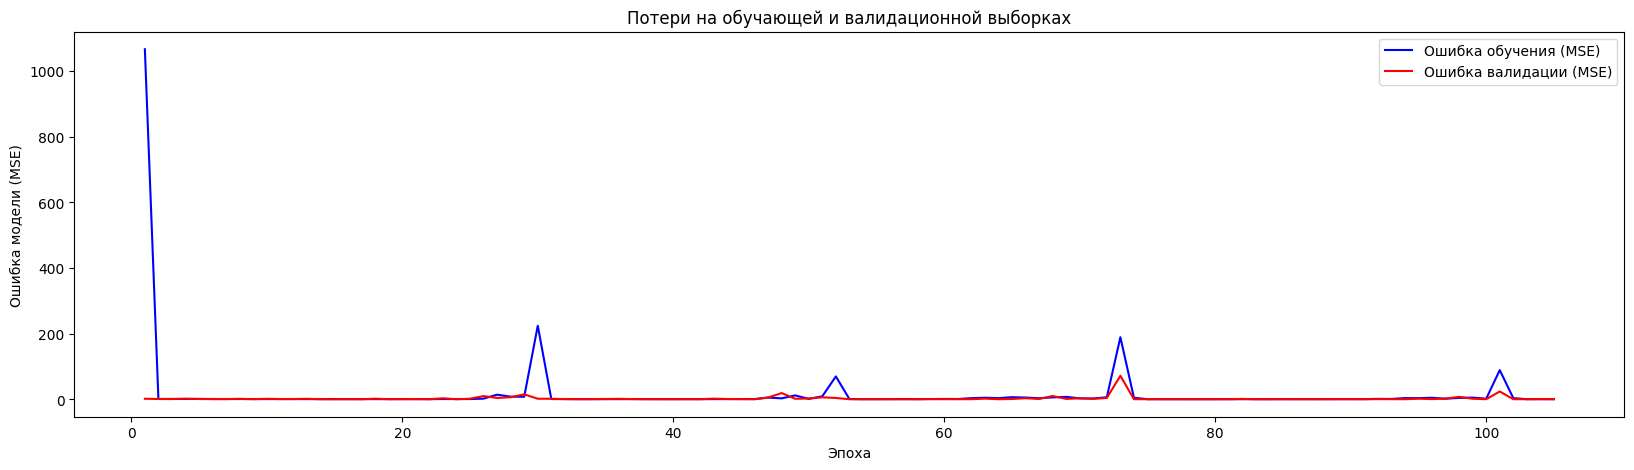

In [65]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

#### Опыт №2

In [66]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(120, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 200
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/200
95/95 [==============================] - 1s 4ms/step - loss: 252.4200 - mae: 8.5702 - val_loss: 0.4875 - val_mae: 0.6077
Epoch 2/200
95/95 [==============================] - 0s 2ms/step - loss: 0.1635 - mae: 0.3209 - val_loss: 0.2251 - val_mae: 0.4181
Epoch 3/200
95/95 [==============================] - 0s 2ms/step - loss: 0.1157 - mae: 0.2657 - val_loss: 0.0676 - val_mae: 0.2091
Epoch 4/200
95/95 [==============================] - 0s 2ms/step - loss: 0.1493 - mae: 0.3059 - val_loss: 0.0657 - val_mae: 0.2155
Epoch 5/200
95/95 [==============================] - 0s 2ms/step - loss: 0.0818 - mae: 0.2252 - val_loss: 0.0668 - val_mae: 0.1949
Epoch 6/200
95/95 [==============================] - 0s 2ms/step - loss: 0.0791 - mae: 0.2230 - val_loss: 0.0335 - val_mae: 0.1461
Epoch 7/200
95/95 [==============================] - 0s 2ms/step - loss: 0.0663 - mae: 0.2022 - val_loss: 0.1667 - val_mae: 0.3801
Epoch 8/200
95/95 [==============================] - 0s 2ms/step - loss: 0.0722 -

In [67]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 2ms/step
MSE: 0.585454


In [68]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,0.813960
637,0.18,0.820703
432,0.05,0.835964
1029,0.05,0.867978
793,0.03,0.733650
...,...,...
1019,0.19,0.790395
1032,0.49,1.113424
488,0.02,0.808589
83,0.33,0.912734


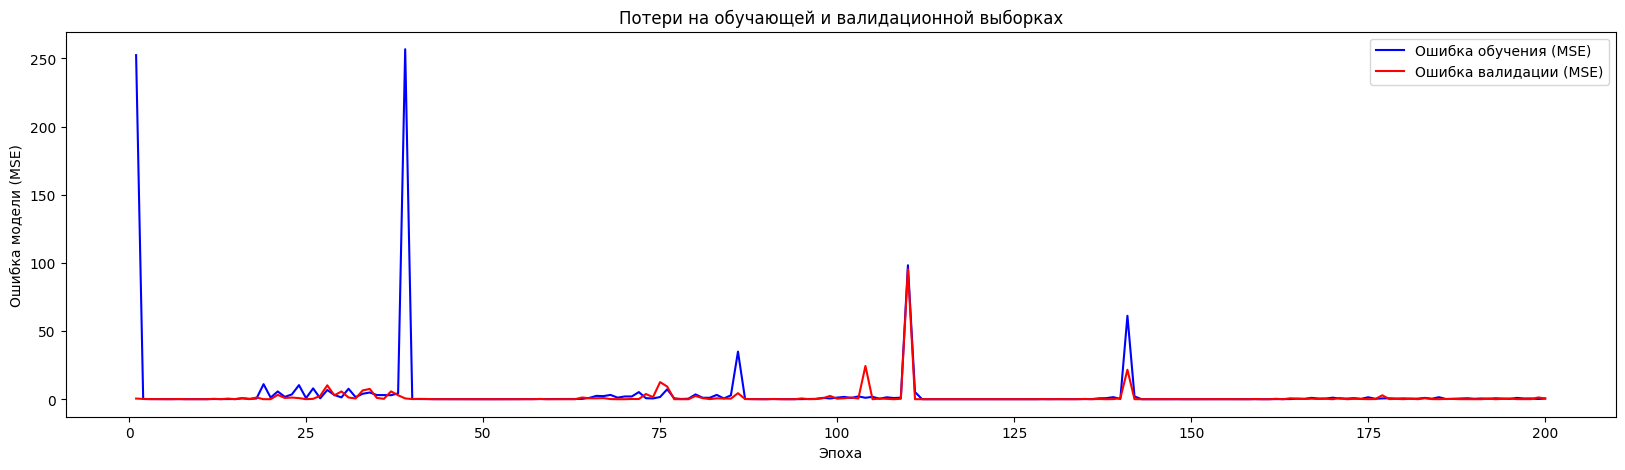

In [69]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

#### Опыт №3

In [70]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(30, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 200
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/200
95/95 [==============================] - 1s 4ms/step - loss: 777.1776 - mae: 14.6937 - val_loss: 1.0525 - val_mae: 0.8771
Epoch 2/200
95/95 [==============================] - 0s 2ms/step - loss: 0.9381 - mae: 0.7433 - val_loss: 0.6715 - val_mae: 0.6693
Epoch 3/200
95/95 [==============================] - 0s 2ms/step - loss: 0.7438 - mae: 0.6628 - val_loss: 0.8811 - val_mae: 0.8081
Epoch 4/200
95/95 [==============================] - 0s 2ms/step - loss: 0.7639 - mae: 0.6808 - val_loss: 0.4873 - val_mae: 0.5820
Epoch 5/200
95/95 [==============================] - 0s 2ms/step - loss: 0.5717 - mae: 0.5773 - val_loss: 0.9401 - val_mae: 0.7732
Epoch 6/200
95/95 [==============================] - 0s 2ms/step - loss: 0.5127 - mae: 0.5478 - val_loss: 0.3416 - val_mae: 0.4796
Epoch 7/200
95/95 [==============================] - 0s 2ms/step - loss: 0.4429 - mae: 0.5115 - val_loss: 0.5572 - val_mae: 0.5706
Epoch 8/200
95/95 [==============================] - 0s 2ms/step - loss: 0.4956 

In [71]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 2ms/step
MSE: 0.038057


In [72]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,-0.120416
637,0.18,-0.078887
432,0.05,-0.087831
1029,0.05,-0.071700
793,0.03,-0.170398
...,...,...
1019,0.19,-0.065627
1032,0.49,0.152785
488,0.02,-0.064382
83,0.33,0.002486


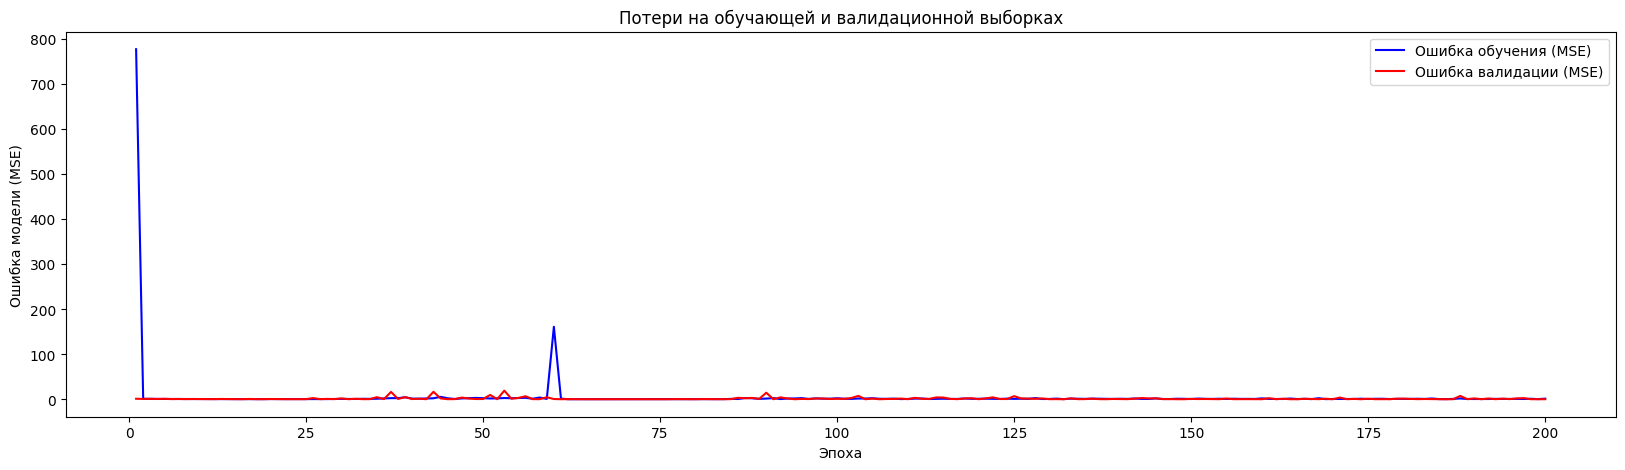

In [73]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

#### Опыт №4

In [74]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(1))

regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 5
epochs = 200
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/200
189/189 [==============================] - 1s 3ms/step - loss: 986.5160 - mae: 12.1508 - val_loss: 2.2065 - val_mae: 1.0829
Epoch 2/200
189/189 [==============================] - 0s 2ms/step - loss: 2.1042 - mae: 1.0901 - val_loss: 1.5561 - val_mae: 0.8883
Epoch 3/200
189/189 [==============================] - 0s 2ms/step - loss: 2.0065 - mae: 1.0922 - val_loss: 1.7584 - val_mae: 0.9333
Epoch 4/200
189/189 [==============================] - 0s 2ms/step - loss: 2.3611 - mae: 1.1732 - val_loss: 1.4730 - val_mae: 0.8482
Epoch 5/200
189/189 [==============================] - 0s 2ms/step - loss: 2.2973 - mae: 1.1880 - val_loss: 1.9437 - val_mae: 1.1205
Epoch 6/200
189/189 [==============================] - 0s 2ms/step - loss: 2.5285 - mae: 1.2289 - val_loss: 1.6123 - val_mae: 0.9815
Epoch 7/200
189/189 [==============================] - 0s 2ms/step - loss: 2.7560 - mae: 1.3075 - val_loss: 1.4690 - val_mae: 0.9200
Epoch 8/200
189/189 [==============================] - 0s 2ms/step

In [75]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 2ms/step
MSE: 0.105702


In [76]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,-0.214579
637,0.18,-0.194102
432,0.05,-0.273650
1029,0.05,-0.198865
793,0.03,-0.297538
...,...,...
1019,0.19,-0.216330
1032,0.49,0.037133
488,0.02,-0.217004
83,0.33,-0.144707


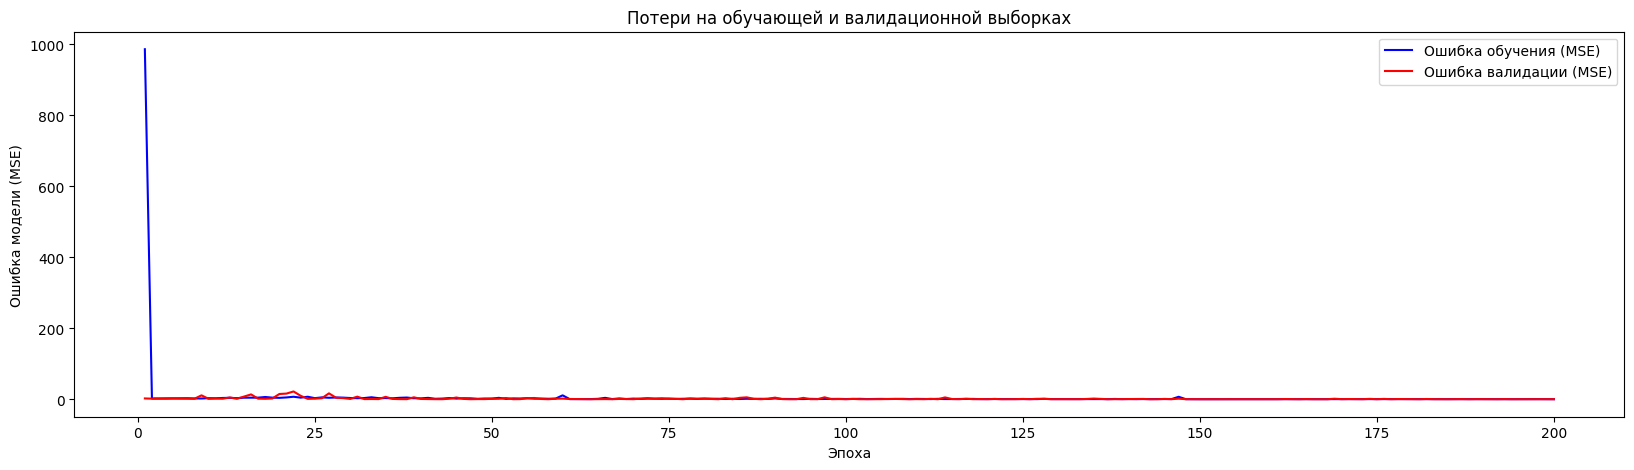

In [77]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

#### Опыт №5

In [78]:
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model = Sequential()

regres_model.add(Dense(120, activation='relu', input_dim = X_train.shape[1]))
regres_model.add(Dense(60, activation='relu'))
regres_model.add(Dense(30, activation='relu'))
regres_model.add(Dense(1))
regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

batch_size = 10
epochs = 50
# --------------------------------------------------------------------------------------
# Место где мы играемся с параметрами 
# --------------------------------------------------------------------------------------
regres_model_hist = regres_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/50
95/95 [==============================] - 1s 4ms/step - loss: 450.6120 - mae: 11.4530 - val_loss: 1.8979 - val_mae: 1.1632
Epoch 2/50
95/95 [==============================] - 0s 2ms/step - loss: 1.8649 - mae: 1.0339 - val_loss: 1.8775 - val_mae: 1.0170
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 1.6276 - mae: 0.9872 - val_loss: 1.4477 - val_mae: 0.8745
Epoch 4/50
95/95 [==============================] - 0s 2ms/step - loss: 2.7713 - mae: 1.3314 - val_loss: 3.5847 - val_mae: 1.7400
Epoch 5/50
95/95 [==============================] - 0s 3ms/step - loss: 1.5241 - mae: 0.9601 - val_loss: 4.1103 - val_mae: 1.8562
Epoch 6/50
95/95 [==============================] - 0s 3ms/step - loss: 1.3112 - mae: 0.8918 - val_loss: 0.6701 - val_mae: 0.5763
Epoch 7/50
95/95 [==============================] - 0s 2ms/step - loss: 1.5727 - mae: 0.9789 - val_loss: 1.0043 - val_mae: 0.8776
Epoch 8/50
95/95 [==============================] - 0s 2ms/step - loss: 1.7145 - mae: 1

In [79]:
y_pred = regres_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse_results.append(mse)

print("MSE: %f" % (mse))

10/10 [==============================] - 0s 1ms/step
MSE: 8.488246


In [80]:
result_df = pd.DataFrame() 
result_df['Test'] = y_test
result_df['Pred'] = y_pred

result_df

,Test,Pred
770,0.09,-2.809444
637,0.18,-2.690746
432,0.05,-2.829830
1029,0.05,-2.903301
793,0.03,-2.964779
...,...,...
1019,0.19,-2.568119
1032,0.49,-2.589474
488,0.02,-2.795666
83,0.33,-2.545483


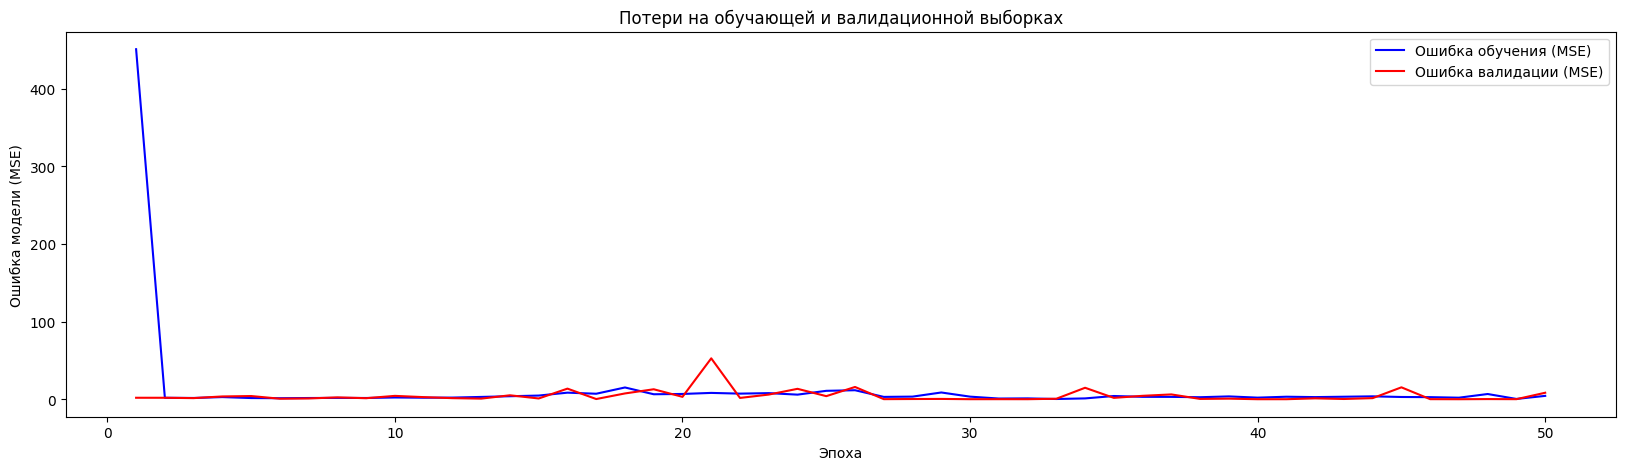

In [81]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epoch = range(1,epochs+1)

plt.figure(figsize=(20,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epoch,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epoch,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

#### Результаты

In [82]:
num = 1

for mse in mse_results:
    print(f'Опыт №{num}')
    print('MSE:', mse)
    print('RMSE:', np.sqrt(mse))
    print()

    num += 1

Опыт №1
MSE: 0.2252579818855369
RMSE: 0.47461350790462853

Опыт №2
MSE: 0.5854541999390919
RMSE: 0.7651497892171779

Опыт №3
MSE: 0.03805685658870365
RMSE: 0.19508166645972566

Опыт №4
MSE: 0.1057017162875517
RMSE: 0.3251180036349136

Опыт №5
MSE: 8.48824597854582
RMSE: 2.9134594520167636



### Сравнение

In [83]:
res_regression = pd.DataFrame()

res_regression['SKLearn'] = mse_results_sklearn
res_regression['Keras'] = mse_results

res_regression

,SKLearn,Keras
0,0.013115,0.225258
1,0.013048,0.585454
2,0.390004,0.038057
3,0.013055,0.105702
4,0.013300,8.488246


# Классификация

## Подготовка данных

In [84]:
result_slice_df = result_slice_df.drop(columns = ['Unnamed: 0'])
result_slice_df

,DEPT,AGK,BK,DS,DT,GGKP,GK,GZ1,GZ2,GZ3,...,NGK,NKT,PS,PZ,SATURAT_new,Soil_new,kp_new,well,FZ,EF_b
0,3732.4,0.199,9.570,NaN,257.953003,2.570,4.806,NaN,NaN,NaN,...,NaN,3.667,399.864990,13.26,NaN,NaN,NaN,192,NaN,4.0
1,3732.5,0.268,9.520,NaN,258.623993,2.549,4.608,NaN,NaN,NaN,...,NaN,3.581,399.803009,13.32,NaN,NaN,NaN,192,1.0,4.0
2,3732.6,0.297,8.530,NaN,260.045990,2.508,4.523,NaN,NaN,NaN,...,NaN,3.475,399.740997,13.29,NaN,NaN,NaN,192,1.0,4.0
3,3732.7,0.278,8.120,NaN,261.467987,2.467,4.578,NaN,NaN,NaN,...,NaN,3.382,399.618011,13.32,NaN,NaN,NaN,192,1.0,4.0
4,3732.8,0.243,8.480,NaN,263.162994,2.448,4.680,NaN,NaN,NaN,...,NaN,3.305,399.493988,13.20,NaN,NaN,NaN,192,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,3710.6,0.341,12.230,NaN,243.220001,NaN,10.770,10.990,22.350000,25.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0
18294,3710.7,0.295,10.715,NaN,244.119995,NaN,11.010,10.485,21.565001,25.325001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0
18295,3710.8,0.249,9.200,NaN,245.020004,NaN,11.250,9.980,20.780001,24.760000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0
18296,3710.9,0.326,9.650,NaN,245.679993,NaN,10.850,9.830,20.585001,24.255001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237,3.0,3.0


In [85]:
col_num = 0
k_miss = .5

half_cols = []

for half_miss in ((result_slice_df.isnull().sum() / result_slice_df.shape[0]) > k_miss):
    if half_miss:
        half_cols.append(result_slice_df.columns.tolist()[col_num])

    col_num += 1

half_cols

['DS',
 'IK',
 'MBK',
 'MDS',
 'MGZ',
 'MPZ',
 'NGK',
 'SATURAT_new',
 'Soil_new',
 'kp_new']

In [86]:
result_slice_df = result_slice_df.drop(
    columns = half_cols
)

In [87]:
result_slice_df = result_slice_df.fillna(method = 'ffill', axis = 0)
result_slice_df = result_slice_df.dropna(axis = 0)    
result_slice_df

,DEPT,AGK,BK,DT,GGKP,GK,GZ1,GZ2,GZ3,GZ4,GZ5,LIT_new,NKT,PS,PZ,well,FZ,EF_b
638,3694.8,0.000,6.870,255.197006,2.526,12.899,6.660,11.980000,10.840000,7.280000,2.810000,0.0,5.875,499.770996,9.63,198,2.0,4.0
639,3694.9,0.000,6.510,258.824005,2.526,13.198,6.890,12.360000,10.720000,7.440000,2.800000,0.0,5.776,499.380005,9.53,198,2.0,4.0
640,3695.0,0.000,6.140,262.451996,2.526,13.595,7.120,12.740000,10.600000,7.600000,2.790000,0.0,5.703,498.989990,9.43,198,2.0,4.0
641,3695.1,0.000,5.860,262.858002,2.526,13.709,7.150,12.930000,10.400000,7.570000,2.760000,0.0,5.644,498.873993,9.35,198,2.0,4.0
642,3695.2,0.000,5.590,263.264008,2.526,13.868,7.170,13.130000,10.200000,7.530000,2.730000,0.0,5.511,498.757996,9.27,198,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,3710.6,0.341,12.230,243.220001,2.507,10.770,10.990,22.350000,25.889999,20.580000,18.360001,0.0,10.181,306.183990,13.77,237,3.0,3.0
18294,3710.7,0.295,10.715,244.119995,2.507,11.010,10.485,21.565001,25.325001,20.100000,18.305000,0.0,10.181,306.183990,13.77,237,3.0,3.0
18295,3710.8,0.249,9.200,245.020004,2.507,11.250,9.980,20.780001,24.760000,19.620001,18.250000,0.0,10.181,306.183990,13.77,237,3.0,3.0
18296,3710.9,0.326,9.650,245.679993,2.507,10.850,9.830,20.585001,24.255001,19.270000,18.235001,0.0,10.181,306.183990,13.77,237,3.0,3.0


In [88]:
result_slice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17660 entries, 638 to 18297
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPT     17660 non-null  float64
 1   AGK      17660 non-null  float64
 2   BK       17660 non-null  float64
 3   DT       17660 non-null  float64
 4   GGKP     17660 non-null  float64
 5   GK       17660 non-null  float64
 6   GZ1      17660 non-null  float64
 7   GZ2      17660 non-null  float64
 8   GZ3      17660 non-null  float64
 9   GZ4      17660 non-null  float64
 10  GZ5      17660 non-null  float64
 11  LIT_new  17660 non-null  float64
 12  NKT      17660 non-null  float64
 13  PS       17660 non-null  float64
 14  PZ       17660 non-null  float64
 15  well     17660 non-null  int64  
 16  FZ       17660 non-null  float64
 17  EF_b     17660 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 2.6 MB


In [89]:
for col in result_slice_df.columns:
    if col != "WELL" and col != "DEPT" and col != "EF_b":
        result_slice_df[col] = MinMaxScaler().fit_transform(result_slice_df[col].array.reshape(-1, 1))

result_slice_df

,DEPT,AGK,BK,DT,GGKP,GK,GZ1,GZ2,GZ3,GZ4,GZ5,LIT_new,NKT,PS,PZ,well,FZ,EF_b
638,3694.8,0.000,0.012728,0.298097,0.481054,0.713570,0.117947,0.054810,0.033267,0.026282,0.006037,0.0,0.097725,0.690787,0.036688,0.024845,0.5,4.0
639,3694.9,0.000,0.011562,0.312598,0.481054,0.734970,0.124850,0.058645,0.032527,0.027846,0.005914,0.0,0.094530,0.689801,0.035283,0.024845,0.5,4.0
640,3695.0,0.000,0.010364,0.327103,0.481054,0.763384,0.131753,0.062481,0.031786,0.029409,0.005791,0.0,0.092174,0.688818,0.033877,0.024845,0.5,4.0
641,3695.1,0.000,0.009457,0.328726,0.481054,0.771543,0.132653,0.064399,0.030552,0.029116,0.005421,0.0,0.090269,0.688525,0.032752,0.024845,0.5,4.0
642,3695.2,0.000,0.008582,0.330349,0.481054,0.782923,0.133253,0.066418,0.029317,0.028725,0.005052,0.0,0.085977,0.688233,0.031628,0.024845,0.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,3710.6,0.341,0.030087,0.250212,0.449753,0.561194,0.247899,0.159483,0.126157,0.156229,0.197634,0.0,0.236695,0.202679,0.094883,0.145963,1.0,3.0
18294,3710.7,0.295,0.025181,0.253810,0.449753,0.578371,0.232743,0.151560,0.122670,0.151539,0.196957,0.0,0.236695,0.202679,0.094883,0.145963,1.0,3.0
18295,3710.8,0.249,0.020274,0.257408,0.449753,0.595548,0.217587,0.143636,0.119183,0.146849,0.196279,0.0,0.236695,0.202679,0.094883,0.145963,1.0,3.0
18296,3710.9,0.326,0.021731,0.260047,0.449753,0.566920,0.213085,0.141668,0.116066,0.143429,0.196094,0.0,0.236695,0.202679,0.094883,0.145963,1.0,3.0


In [90]:
result_slice_df = result_slice_df[result_slice_df.EF_b != 5]

## Опыты

In [91]:
X = result_slice_df.drop(['EF_b'], axis=1)
y = result_slice_df['EF_b']

X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, test_size=0.15, random_state=15)

X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, test_size=0.2,random_state=15)

### SKlearn

In [92]:
accuracy_result = []

#### Опыт №1

In [93]:
#'logistic', 'relu', 'tanh'

batch_size = 200
max_iter = 50

model = MLPClassifier(
    hidden_layer_sizes=(1,2),
    activation='tanh',
    early_stopping=True,
    max_iter= max_iter,
    batch_size  = batch_size
)

hist_cl = model.fit(X_train, y_train)

/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/nel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not

In [94]:
y_pred = model.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy_result.append(accuracy_score(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       227
         2.0       0.42      1.00      0.60      1124
         3.0       0.00      0.00      0.00       307
         4.0       0.00      0.00      0.00       991

    accuracy                           0.42      2649
   macro avg       0.11      0.25      0.15      2649
weighted avg       0.18      0.42      0.25      2649

[[   0  227    0    0]
 [   0 1124    0    0]
 [   0  307    0    0]
 [   0  991    0    0]]


/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Опыт №2

In [95]:
#'logistic', 'relu', 'tanh'

batch_size = 10
max_iter = 200

model = MLPClassifier(
    hidden_layer_sizes=(150),
    # activation='logistic',
    # early_stopping=True,
    max_iter= max_iter,
    batch_size  = batch_size,
    random_state = 10
)

hist_cl = model.fit(X_train, y_train)

In [96]:
y_pred = model.predict(X_test)

print(pd.Series(y_pred).unique())
print(y_test.unique())
print('\n', accuracy_score(y_true=y_test, y_pred=y_pred))
print('\n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n', classification_report(y_true=y_test, y_pred=y_pred))

accuracy_result.append(accuracy_score(y_true=y_test, y_pred=y_pred))

[4. 2. 1. 3.]
[4. 2. 3. 1.]

 0.6896942242355606

 [[  35  138    1   53]
 [   6 1059    1   58]
 [   4  203   21   79]
 [  33  236   10  712]]

               precision    recall  f1-score   support

         1.0       0.45      0.15      0.23       227
         2.0       0.65      0.94      0.77      1124
         3.0       0.64      0.07      0.12       307
         4.0       0.79      0.72      0.75       991

    accuracy                           0.69      2649
   macro avg       0.63      0.47      0.47      2649
weighted avg       0.68      0.69      0.64      2649



#### Опыт №3

In [97]:
#'logistic', 'relu', 'tanh'

batch_size = 10
max_iter = 250

model = MLPClassifier(
    hidden_layer_sizes=(150),
    # activation='logistic',
    # early_stopping=True,
    max_iter= max_iter,
    batch_size  = batch_size,
    random_state = 10
)

hist_cl = model.fit(X_train, y_train)

In [98]:
y_pred = model.predict(X_test)

print(pd.Series(y_pred).unique())
print(y_test.unique())
print('\n', accuracy_score(y_true=y_test, y_pred=y_pred))
print('\n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n', classification_report(y_true=y_test, y_pred=y_pred))

accuracy_result.append(accuracy_score(y_true=y_test, y_pred=y_pred))

[4. 2. 1. 3.]
[4. 2. 3. 1.]

 0.6896942242355606

 [[  35  138    1   53]
 [   6 1059    1   58]
 [   4  203   21   79]
 [  33  236   10  712]]

               precision    recall  f1-score   support

         1.0       0.45      0.15      0.23       227
         2.0       0.65      0.94      0.77      1124
         3.0       0.64      0.07      0.12       307
         4.0       0.79      0.72      0.75       991

    accuracy                           0.69      2649
   macro avg       0.63      0.47      0.47      2649
weighted avg       0.68      0.69      0.64      2649



#### Опыт №4

In [99]:
#'logistic', 'relu', 'tanh'

batch_size = 10
max_iter = 250

model = MLPClassifier(
    hidden_layer_sizes=(100),
    # activation='logistic',
    # early_stopping=True,
    max_iter= max_iter,
    batch_size  = batch_size,
    random_state = 10
)

hist_cl = model.fit(X_train, y_train)

In [100]:
y_pred = model.predict(X_test)

print(pd.Series(y_pred).unique())
print(y_test.unique())
print('\n', accuracy_score(y_true=y_test, y_pred=y_pred))
print('\n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n', classification_report(y_true=y_test, y_pred=y_pred))

accuracy_result.append(accuracy_score(y_true=y_test, y_pred=y_pred))

[4. 2. 1.]
[4. 2. 3. 1.]

 0.6896942242355606

 [[   0  128    0   99]
 [   0 1071    0   53]
 [   0  237    0   70]
 [   3  232    0  756]]

               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       227
         2.0       0.64      0.95      0.77      1124
         3.0       0.00      0.00      0.00       307
         4.0       0.77      0.76      0.77       991

    accuracy                           0.69      2649
   macro avg       0.35      0.43      0.38      2649
weighted avg       0.56      0.69      0.61      2649



/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Опыт №5

In [101]:
#'logistic', 'relu', 'tanh'

batch_size = 15
max_iter = 500

model = MLPClassifier(
    hidden_layer_sizes=(200),
    # activation='logistic',
    # early_stopping=True,
    max_iter= max_iter,
    batch_size  = batch_size,
    random_state = 10
)

hist_cl = model.fit(X_train, y_train)

In [102]:
y_pred = model.predict(X_test)

print(pd.Series(y_pred).unique())
print(y_test.unique())
print('\n', accuracy_score(y_true=y_test, y_pred=y_pred))
print('\n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n', classification_report(y_true=y_test, y_pred=y_pred))

accuracy_result.append(accuracy_score(y_true=y_test, y_pred=y_pred))

[4. 2. 1.]
[4. 2. 3. 1.]

 0.6640241600604001

 [[  1  70   0 156]
 [  2 865   0 257]
 [  1 181   0 125]
 [  2  96   0 893]]

               precision    recall  f1-score   support

         1.0       0.17      0.00      0.01       227
         2.0       0.71      0.77      0.74      1124
         3.0       0.00      0.00      0.00       307
         4.0       0.62      0.90      0.74       991

    accuracy                           0.66      2649
   macro avg       0.38      0.42      0.37      2649
weighted avg       0.55      0.66      0.59      2649



/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Результаты опытов

In [103]:
accuracy_result

[0.42431106077765196,
 0.6896942242355606,
 0.6896942242355606,
 0.6896942242355606,
 0.6640241600604001]

### Keras

In [104]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [105]:
accuracy_keras_result = []

#### Опыт №1

In [106]:
multiClassifierModel = Sequential()
multiClassifierModel.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
multiClassifierModel.add(Dense(5,activation='softmax'))
multiClassifierModel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

multiClassifierHistory = multiClassifierModel.fit(
    X_train, 
    y_train, 
    batch_size=10, 
    epochs=150,
    validation_data=(X_val,y_val)
)

Epoch 1/150
1201/1201 [==============================] - 3s 2ms/step - loss: 31.6311 - accuracy: 0.4374 - val_loss: 1.6218 - val_accuracy: 0.4154
Epoch 2/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.3940 - accuracy: 0.5045 - val_loss: 1.1592 - val_accuracy: 0.5783
Epoch 3/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.3162 - accuracy: 0.5413 - val_loss: 1.2824 - val_accuracy: 0.4714
Epoch 4/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.2491 - accuracy: 0.5708 - val_loss: 2.1448 - val_accuracy: 0.4194
Epoch 5/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.2663 - accuracy: 0.5742 - val_loss: 0.9552 - val_accuracy: 0.6845
Epoch 6/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.2079 - accuracy: 0.5860 - val_loss: 1.1636 - val_accuracy: 0.4990
Epoch 7/150
1201/1201 [==============================] - 3s 2ms/step - loss: 1.2304 - accuracy: 0.5909 - val_loss: 0.9465 - val_a

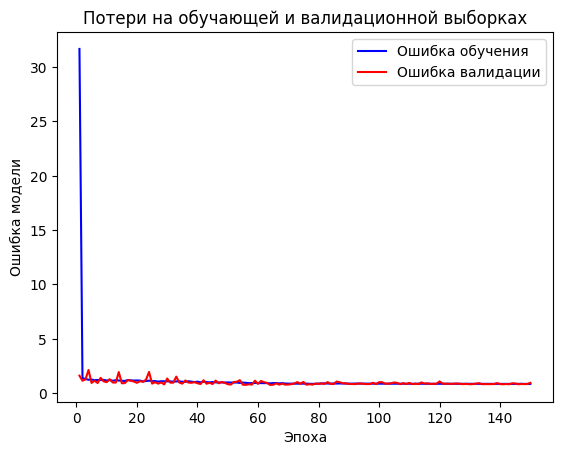

In [107]:
loss_function = multiClassifierHistory.history['loss']
val_loss_function = multiClassifierHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели')
plt.legend()
plt.show()

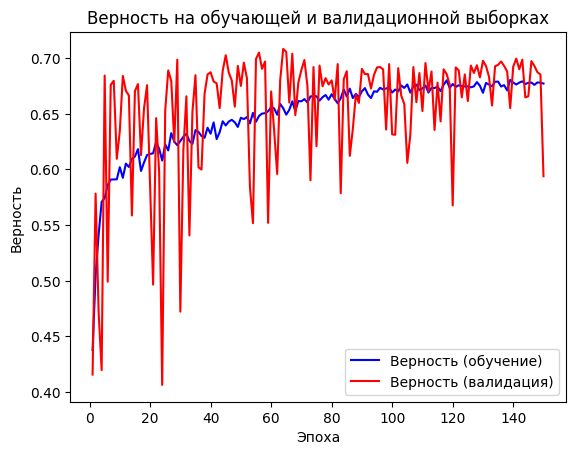

In [108]:
accuracy = multiClassifierHistory.history['accuracy']
val_accuracy = multiClassifierHistory.history['val_accuracy']

plt.title('Верность на обучающей и валидационной выборках')
plt.plot(epochs,accuracy,color='blue',label='Верность (обучение)')
plt.plot(epochs,val_accuracy,color='red',label='Верность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Верность')
plt.legend()
plt.show()

In [109]:
y_pred = multiClassifierModel.predict(X_test)

correct_counter = 0
row_num = 0

for y in y_pred:
    max_y = 0
    max_y_class = 0
    y_class = 0

    for value in y:

        if value > max_y:
            max_y = value
            max_y_class = y_class

        y_class += 1

    if y_test[row_num][max_y_class] == 1:
        correct_counter += 1

    row_num += 1

accuracy_keras_result.append(correct_counter / y_test.shape[0])
print('Accurency: ', accuracy_keras_result[-1])

83/83 [==============================] - 0s 1ms/step
Accurency:  0.5972064930162325


#### Опыт №2

In [110]:
multiClassifierModel = Sequential()
multiClassifierModel.add(Dense(5,activation='relu',input_dim=X_train.shape[1]))
multiClassifierModel.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
multiClassifierModel.add(Dense(5,activation='softmax'))
multiClassifierModel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

multiClassifierHistory = multiClassifierModel.fit(
    X_train, 
    y_train, 
    batch_size=10, 
    epochs=150,
    validation_data=(X_val,y_val)
)

Epoch 1/150
1201/1201 [==============================] - 3s 2ms/step - loss: 12.1052 - accuracy: 0.4078 - val_loss: 1.2476 - val_accuracy: 0.4154
Epoch 2/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.2179 - accuracy: 0.4186 - val_loss: 1.2033 - val_accuracy: 0.4154
Epoch 3/150
1201/1201 [==============================] - 3s 2ms/step - loss: 1.2023 - accuracy: 0.4186 - val_loss: 1.1986 - val_accuracy: 0.4154
Epoch 4/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.1997 - accuracy: 0.4186 - val_loss: 1.1970 - val_accuracy: 0.4154
Epoch 5/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.1987 - accuracy: 0.4186 - val_loss: 1.1963 - val_accuracy: 0.4154
Epoch 6/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.1982 - accuracy: 0.4186 - val_loss: 1.1962 - val_accuracy: 0.4154
Epoch 7/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.1981 - accuracy: 0.4186 - val_loss: 1.1961 - val_a

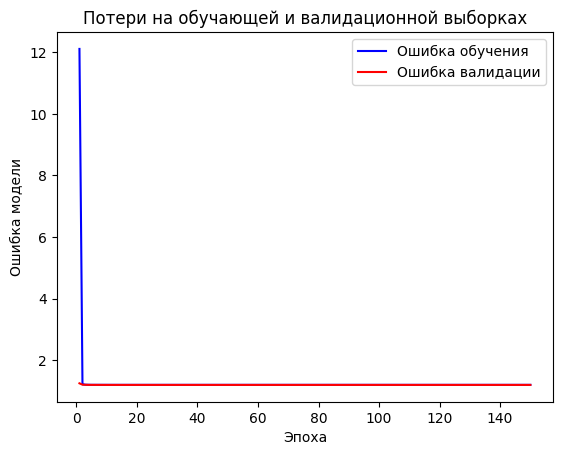

In [111]:
loss_function = multiClassifierHistory.history['loss']
val_loss_function = multiClassifierHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели')
plt.legend()
plt.show()

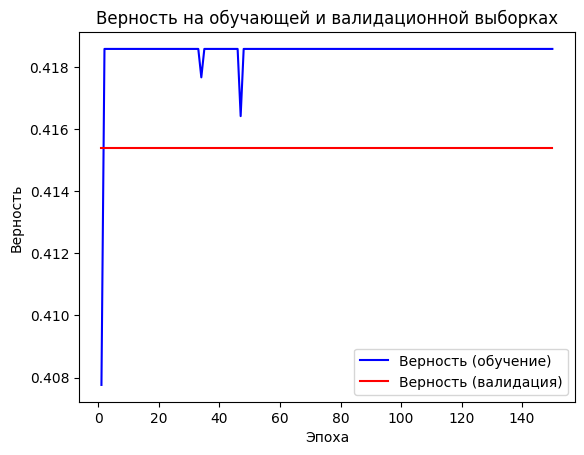

In [112]:
accuracy = multiClassifierHistory.history['accuracy']
val_accuracy = multiClassifierHistory.history['val_accuracy']

plt.title('Верность на обучающей и валидационной выборках')
plt.plot(epochs,accuracy,color='blue',label='Верность (обучение)')
plt.plot(epochs,val_accuracy,color='red',label='Верность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Верность')
plt.legend()
plt.show()

In [113]:
y_pred = multiClassifierModel.predict(X_test)

correct_counter = 0
row_num = 0

for y in y_pred:
    max_y = 0
    max_y_class = 0
    y_class = 0

    for value in y:

        if value > max_y:
            max_y = value
            max_y_class = y_class

        y_class += 1

    if y_test[row_num][max_y_class] == 1:
        correct_counter += 1

    row_num += 1

accuracy_keras_result.append(correct_counter / y_test.shape[0])
print('Accurency: ', accuracy_keras_result[-1])

83/83 [==============================] - 0s 1ms/step
Accurency:  0.42431106077765196


#### Опыт №3

In [114]:
multiClassifierModel = Sequential()
multiClassifierModel.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
multiClassifierModel.add(Dense(5,activation='softmax'))
multiClassifierModel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

multiClassifierHistory = multiClassifierModel.fit(
    X_train, 
    y_train, 
    batch_size=5, 
    epochs=100,
    validation_data=(X_val,y_val)
)

Epoch 1/100
2402/2402 [==============================] - 5s 2ms/step - loss: 41.8541 - accuracy: 0.4057 - val_loss: 1.7821 - val_accuracy: 0.4154
Epoch 2/100
2402/2402 [==============================] - 4s 2ms/step - loss: 1.5398 - accuracy: 0.4780 - val_loss: 1.4221 - val_accuracy: 0.2365
Epoch 3/100
2402/2402 [==============================] - 4s 2ms/step - loss: 1.4968 - accuracy: 0.5100 - val_loss: 1.4342 - val_accuracy: 0.5413
Epoch 4/100
2402/2402 [==============================] - 5s 2ms/step - loss: 1.4775 - accuracy: 0.5245 - val_loss: 2.0932 - val_accuracy: 0.3934
Epoch 5/100
2402/2402 [==============================] - 4s 2ms/step - loss: 1.4433 - accuracy: 0.5465 - val_loss: 1.3960 - val_accuracy: 0.5973
Epoch 6/100
2402/2402 [==============================] - 4s 2ms/step - loss: 1.3960 - accuracy: 0.5549 - val_loss: 1.3209 - val_accuracy: 0.6292
Epoch 7/100
2402/2402 [==============================] - 4s 2ms/step - loss: 1.3817 - accuracy: 0.5575 - val_loss: 1.6197 - val_a

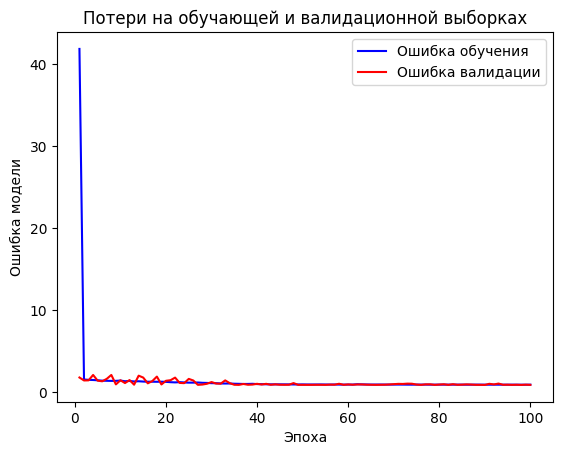

In [115]:
loss_function = multiClassifierHistory.history['loss']
val_loss_function = multiClassifierHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели')
plt.legend()
plt.show()

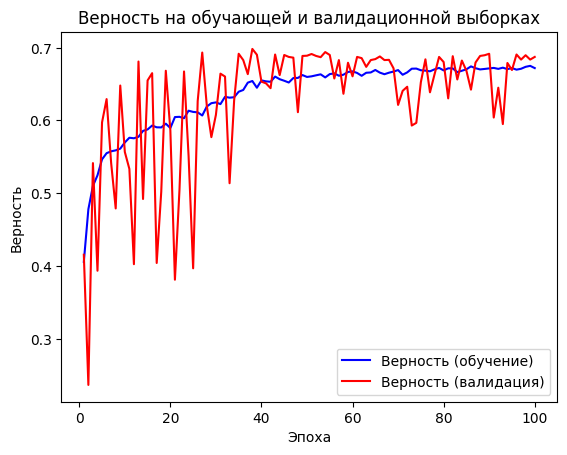

In [116]:
accuracy = multiClassifierHistory.history['accuracy']
val_accuracy = multiClassifierHistory.history['val_accuracy']

plt.title('Верность на обучающей и валидационной выборках')
plt.plot(epochs,accuracy,color='blue',label='Верность (обучение)')
plt.plot(epochs,val_accuracy,color='red',label='Верность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Верность')
plt.legend()
plt.show()

In [117]:
y_pred = multiClassifierModel.predict(X_test)

correct_counter = 0
row_num = 0

for y in y_pred:
    max_y = 0
    max_y_class = 0
    y_class = 0

    for value in y:

        if value > max_y:
            max_y = value
            max_y_class = y_class

        y_class += 1

    if y_test[row_num][max_y_class] == 1:
        correct_counter += 1

    row_num += 1

accuracy_keras_result.append(correct_counter / y_test.shape[0])
print('Accurency: ', accuracy_keras_result[-1])

83/83 [==============================] - 0s 1ms/step
Accurency:  0.6840317100792752


#### Опыт №4

In [118]:
multiClassifierModel = Sequential()
multiClassifierModel.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
multiClassifierModel.add(Dense(5,activation='softmax'))
multiClassifierModel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

multiClassifierHistory = multiClassifierModel.fit(
    X_train, 
    y_train, 
    batch_size=5, 
    epochs=150,
    validation_data=(X_val,y_val)
)

Epoch 1/150
2402/2402 [==============================] - 5s 2ms/step - loss: 3.4127 - accuracy: 0.3994 - val_loss: 1.2563 - val_accuracy: 0.4154
Epoch 2/150
2402/2402 [==============================] - 4s 2ms/step - loss: 1.2334 - accuracy: 0.4186 - val_loss: 1.2155 - val_accuracy: 0.4154
Epoch 3/150
2402/2402 [==============================] - 4s 2ms/step - loss: 1.2100 - accuracy: 0.4186 - val_loss: 1.2028 - val_accuracy: 0.4154
Epoch 4/150
2402/2402 [==============================] - 4s 2ms/step - loss: 1.2023 - accuracy: 0.4186 - val_loss: 1.1983 - val_accuracy: 0.4154
Epoch 5/150
2402/2402 [==============================] - 4s 2ms/step - loss: 1.1993 - accuracy: 0.4186 - val_loss: 1.1966 - val_accuracy: 0.4154
Epoch 6/150
2402/2402 [==============================] - 4s 2ms/step - loss: 1.1983 - accuracy: 0.4186 - val_loss: 1.1960 - val_accuracy: 0.4154
Epoch 7/150
2402/2402 [==============================] - 4s 2ms/step - loss: 1.1977 - accuracy: 0.4186 - val_loss: 1.1966 - val_ac

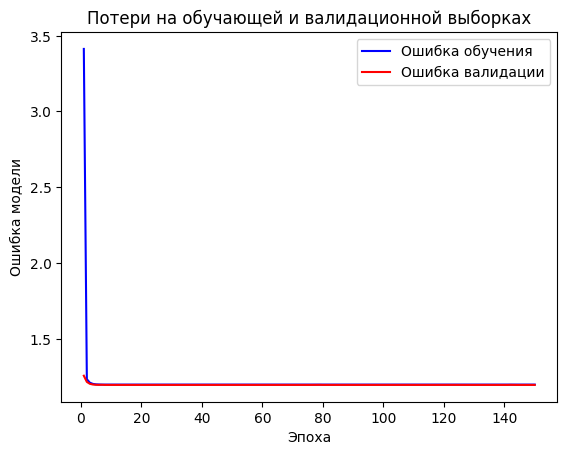

In [119]:
loss_function = multiClassifierHistory.history['loss']
val_loss_function = multiClassifierHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели')
plt.legend()
plt.show()

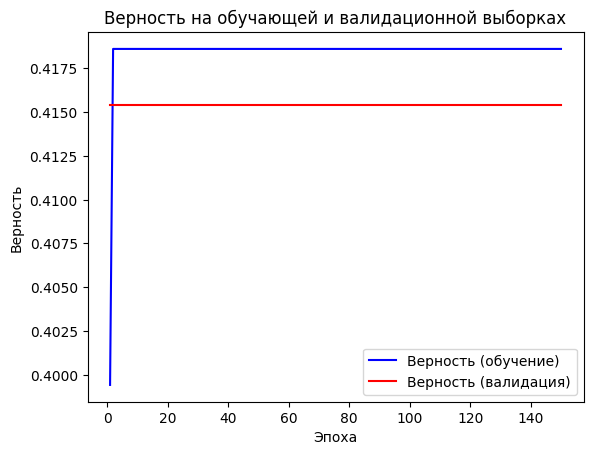

In [120]:
accuracy = multiClassifierHistory.history['accuracy']
val_accuracy = multiClassifierHistory.history['val_accuracy']

plt.title('Верность на обучающей и валидационной выборках')
plt.plot(epochs,accuracy,color='blue',label='Верность (обучение)')
plt.plot(epochs,val_accuracy,color='red',label='Верность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Верность')
plt.legend()
plt.show()

In [121]:
y_pred = multiClassifierModel.predict(X_test)

correct_counter = 0
row_num = 0

for y in y_pred:
    max_y = 0
    max_y_class = 0
    y_class = 0

    for value in y:

        if value > max_y:
            max_y = value
            max_y_class = y_class

        y_class += 1

    if y_test[row_num][max_y_class] == 1:
        correct_counter += 1

    row_num += 1

accuracy_keras_result.append(correct_counter / y_test.shape[0])
print('Accurency: ', accuracy_keras_result[-1])

83/83 [==============================] - 0s 1ms/step
Accurency:  0.42431106077765196


#### Опыт №5

In [122]:
multiClassifierModel = Sequential()
multiClassifierModel.add(Dense(15,activation='relu',input_dim=X_train.shape[1]))
multiClassifierModel.add(Dense(5,activation='softmax'))
multiClassifierModel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

multiClassifierHistory = multiClassifierModel.fit(
    X_train, 
    y_train, 
    batch_size=10, 
    epochs=150,
    validation_data=(X_val,y_val)
)

Epoch 1/150
1201/1201 [==============================] - 3s 2ms/step - loss: 3.1812 - accuracy: 0.3759 - val_loss: 1.8227 - val_accuracy: 0.2841
Epoch 2/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.9409 - accuracy: 0.4287 - val_loss: 1.2377 - val_accuracy: 0.5756
Epoch 3/150
1201/1201 [==============================] - 2s 2ms/step - loss: 2.0281 - accuracy: 0.4589 - val_loss: 1.9049 - val_accuracy: 0.4154
Epoch 4/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.7462 - accuracy: 0.4906 - val_loss: 1.1280 - val_accuracy: 0.5530
Epoch 5/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.7308 - accuracy: 0.5028 - val_loss: 1.6250 - val_accuracy: 0.4564
Epoch 6/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.6452 - accuracy: 0.5271 - val_loss: 4.0571 - val_accuracy: 0.3814
Epoch 7/150
1201/1201 [==============================] - 2s 2ms/step - loss: 1.7537 - accuracy: 0.5139 - val_loss: 2.1997 - val_ac

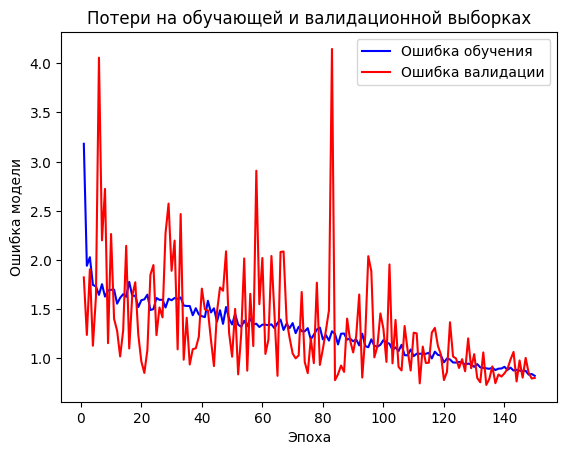

In [123]:
loss_function = multiClassifierHistory.history['loss']
val_loss_function = multiClassifierHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели')
plt.legend()
plt.show()

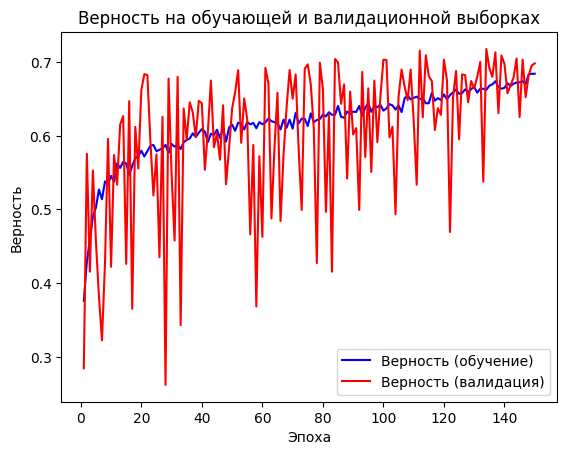

In [124]:
accuracy = multiClassifierHistory.history['accuracy']
val_accuracy = multiClassifierHistory.history['val_accuracy']

plt.title('Верность на обучающей и валидационной выборках')
plt.plot(epochs,accuracy,color='blue',label='Верность (обучение)')
plt.plot(epochs,val_accuracy,color='red',label='Верность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Верность')
plt.legend()
plt.show()

In [125]:
y_pred = multiClassifierModel.predict(X_test)

correct_counter = 0
row_num = 0

for y in y_pred:
    max_y = 0
    max_y_class = 0
    y_class = 0

    for value in y:

        if value > max_y:
            max_y = value
            max_y_class = y_class

        y_class += 1

    if y_test[row_num][max_y_class] == 1:
        correct_counter += 1

    row_num += 1

accuracy_keras_result.append(correct_counter / y_test.shape[0])
print('Accurency: ', accuracy_keras_result[-1])

83/83 [==============================] - 0s 1ms/step
Accurency:  0.6964892412231031


#### Результаты

In [126]:
num = 1

for res in accuracy_keras_result:
    print(num, 'Accurancy:', res)
    num += 1

1 Accurancy: 0.5972064930162325
2 Accurancy: 0.42431106077765196
3 Accurancy: 0.6840317100792752
4 Accurancy: 0.42431106077765196
5 Accurancy: 0.6964892412231031


### Сравнение

In [127]:
res_classifier = pd.DataFrame()

res_classifier['SKLearn'] = accuracy_result
res_classifier['Keras'] = accuracy_keras_result

res_classifier

,SKLearn,Keras
0,0.424311,0.597206
1,0.689694,0.424311
2,0.689694,0.684032
3,0.689694,0.424311
4,0.664024,0.696489
